In [1]:
import pprint as pp
import os
import sys
import pandas as pd
import numpy as np
from importlib import reload 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
"""
Update path 
"""

sys.path.append("../")

In [3]:
import trackingPipeline.track_merge.merge as _merge

In [39]:
reload(_merge)

spots_path = "../outputs/OME_2015-05-13-20-Scene12-D3-Stitched_tile_1-1_SPOTS.csv"

merger = _merge.TrackMerger(spots_path)
print(merger.spots.shape)
merger.spots.columns


(18923, 21)


Index(['Label', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'MANUAL_COLOR', 'MEAN_INTENSITY', 'MEDIAN_INTENSITY', 'MIN_INTENSITY',
       'MAX_INTENSITY', 'TOTAL_INTENSITY', 'STANDARD_DEVIATION',
       'ESTIMATED_DIAMETER', 'CONTRAST', 'SNR'],
      dtype='object')

In [40]:
df = merger.spots
df.head()

,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MANUAL_COLOR,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR
0,ID2804,2804,52,0.009,298.351,9.814,0,0,0,6,...,-10921639,0.088,0.084,0.0,0.273,11.407,0.076,10.743,0.744,0.994
1,ID2835,2835,8,0.011,191.159,21.758,0,0,0,6,...,-10921639,0.112,0.115,0.0,0.276,14.463,0.082,10.809,0.674,1.097
2,ID2868,2868,22,0.006,446.293,34.901,0,0,0,6,...,-10921639,0.063,0.053,0.0,0.217,8.140,0.062,19.840,0.585,0.750
3,ID2872,2872,24,0.009,531.853,36.065,0,0,0,6,...,-10921639,0.093,0.096,0.0,0.242,11.953,0.070,8.453,0.693,1.088
4,ID2873,2873,27,0.013,20.810,37.210,0,0,0,6,...,-10921639,0.142,0.155,0.0,0.388,18.373,0.102,10.898,0.659,1.104


In [41]:
# drop nan track id
print(df.shape)
df = df[df['TRACK_ID'] != 'None']
print(df.shape)

# add track length

df['TRACK_LENGTH'] = df.groupby(['TRACK_ID'])['Label'].transform('count')
df.head()

(18923, 21)
(18039, 21)


<ipython-input-41-5b54b1ba4e51>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TRACK_LENGTH'] = df.groupby(['TRACK_ID'])['Label'].transform('count')


,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR,TRACK_LENGTH
0,ID2804,2804,52,0.009,298.351,9.814,0,0,0,6,...,0.088,0.084,0.0,0.273,11.407,0.076,10.743,0.744,0.994,2
1,ID2835,2835,8,0.011,191.159,21.758,0,0,0,6,...,0.112,0.115,0.0,0.276,14.463,0.082,10.809,0.674,1.097,76
2,ID2868,2868,22,0.006,446.293,34.901,0,0,0,6,...,0.063,0.053,0.0,0.217,8.140,0.062,19.840,0.585,0.750,31
3,ID2872,2872,24,0.009,531.853,36.065,0,0,0,6,...,0.093,0.096,0.0,0.242,11.953,0.070,8.453,0.693,1.088,34
4,ID2873,2873,27,0.013,20.810,37.210,0,0,0,6,...,0.142,0.155,0.0,0.388,18.373,0.102,10.898,0.659,1.104,27


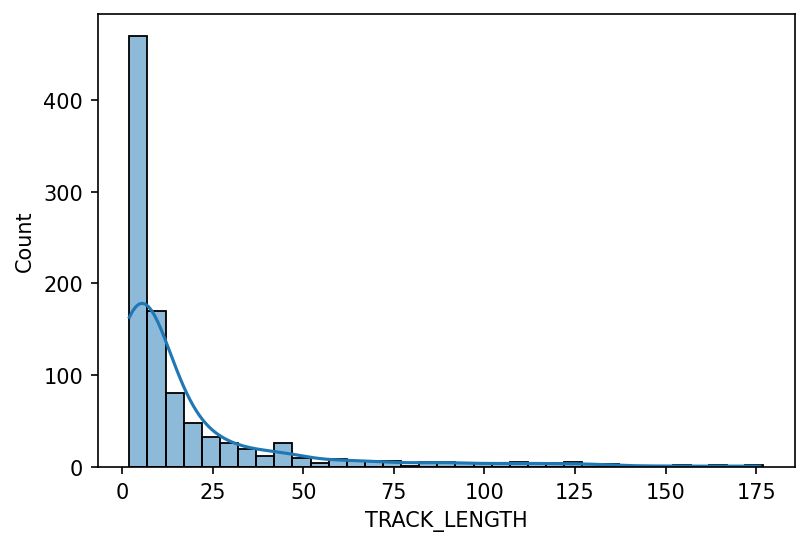

In [42]:
# how long are tracks in general?

track_lengths = df[['TRACK_ID', 'TRACK_LENGTH']].drop_duplicates()

matplotlib.rcParams['figure.dpi'] = 150
sns.histplot(data=track_lengths,
             x='TRACK_LENGTH',
             binwidth=5,
             kde=True)

In [43]:
# filter short tracks

df = df[df['TRACK_LENGTH'] >= 20]
print(df.shape)


(13326, 22)


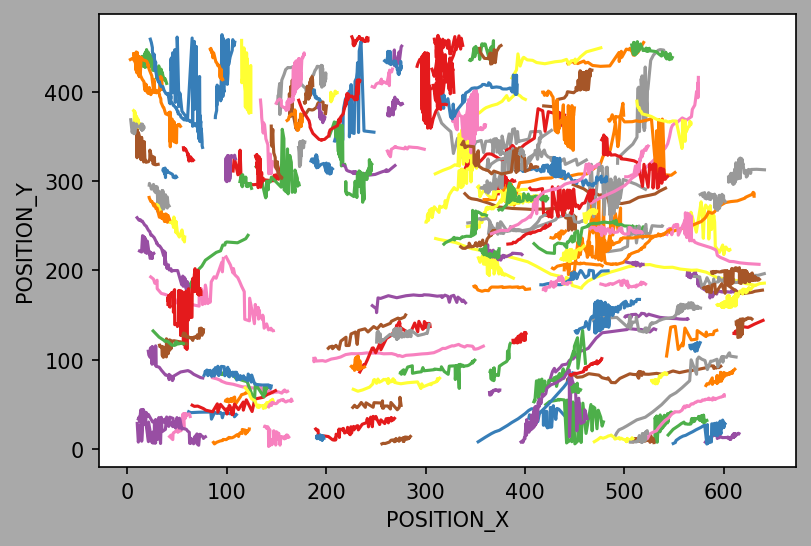

In [50]:
# plot the longest tracks

mask = (df['TRACK_LENGTH'] > 20) & (df['TRACK_LENGTH'] < 100)

tracks_of_interest = df[mask]

sns.lineplot(data=tracks_of_interest,
             x='POSITION_X',
             y='POSITION_Y',
             hue='TRACK_ID',
             palette='Set1')

plt.legend([],[], frameon=False)

In [52]:
df.columns

Index(['Label', 'ID', 'TRACK_ID', 'QUALITY', 'POSITION_X', 'POSITION_Y',
       'POSITION_Z', 'POSITION_T', 'FRAME', 'RADIUS', 'VISIBILITY',
       'MANUAL_COLOR', 'MEAN_INTENSITY', 'MEDIAN_INTENSITY', 'MIN_INTENSITY',
       'MAX_INTENSITY', 'TOTAL_INTENSITY', 'STANDARD_DEVIATION',
       'ESTIMATED_DIAMETER', 'CONTRAST', 'SNR', 'TRACK_LENGTH'],
      dtype='object')

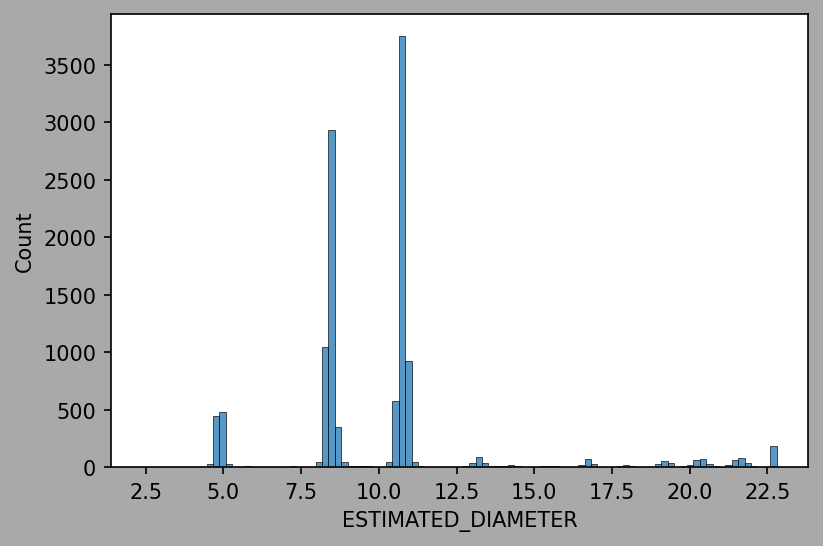

In [62]:
matplotlib.rcParams['figure.dpi'] = 150

column = 'ESTIMATED_DIAMETER'

subset = df[['TRACK_ID', column]].drop_duplicates()



sns.histplot(data=subset,
             x=column)